In [1]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.optimizers import Adam, SGD
from keras.losses import CategoricalCrossentropy
from keras.utils import plot_model

import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()


In [2]:
print(f'Number of training data: {X_train.shape[0]}')
print(f'Number of test data: {X_test.shape[0]}')
print(f'Image size: ({X_train.shape[1]}, {X_train.shape[2]})')
print(f'Number of color channels: {X_train.shape[3]}')
print(f'Shape of results: {y_train.shape[1:]}')
print(f'Results value range: ({y_train.min()}, {y_train.max()})')
print(f'Data value range: ({X_train.min()}, {X_train.max()})')

Number of training data: 50000
Number of test data: 10000
Image size: (32, 32)
Number of color channels: 3
Shape of results: (1,)
Results value range: (0, 9)
Data value range: (0, 255)


In [3]:
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0
y_train, y_test = tf.one_hot(y_train.flatten(), 10), tf.one_hot(y_test.flatten(), 10)

In [4]:
print(f'Shape of results: {y_train.shape[1:]}')
print(f'Results value range: ({np.min(y_train)}, {np.max(y_train)})')
print(f'Data value range: ({X_train.min()}, {X_train.max()})')

Shape of results: (10,)
Results value range: (0.0, 1.0)
Data value range: (0.0, 1.0)


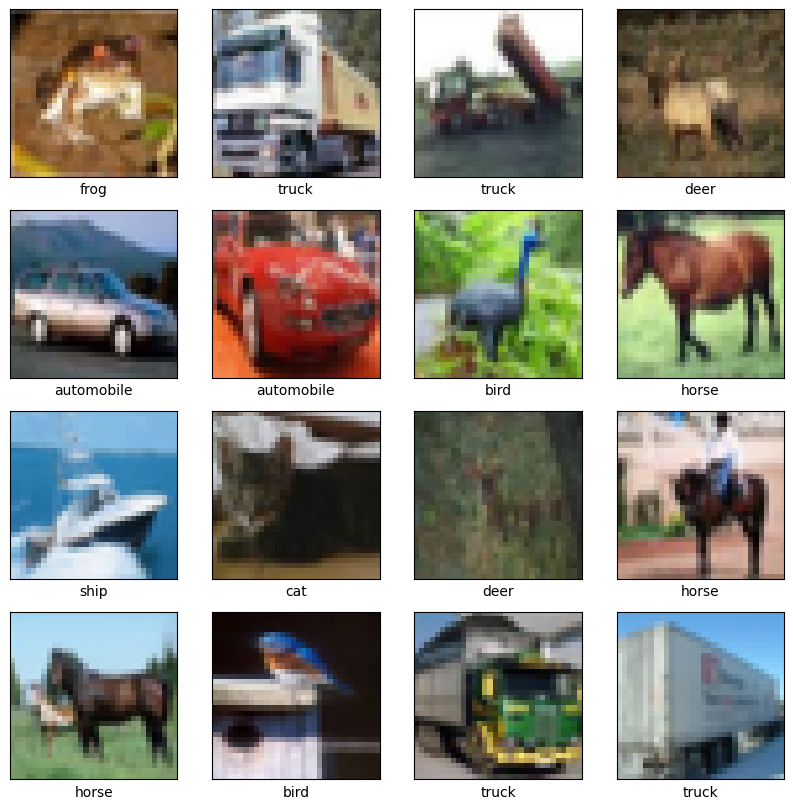

In [5]:
class_names = ('airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck')

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    idx = [_ for _ in range(len(y_train[i])) if y_train[i][_] == 1]
    plt.xlabel(class_names[idx[0]])
plt.show()

In [6]:
def train_model(X, y, Xval, yval, layers, opt, learning_rate, batch_size, momentum=None):
  model = keras.models.Sequential([Input(shape = X.shape[1:])])
  for l in layers:
    model.add(l)
  model.add(Flatten())
  model.add(Dense(10, activation = 'softmax'))
  if momentum:
    opt = opt(learning_rate = learning_rate, momentum = momentum)
  else:
    opt = opt(learning_rate = learning_rate)
  model.compile(optimizer = opt, loss = CategoricalCrossentropy(), metrics=['categorical_accuracy'])
  history = model.fit(X, y, batch_size = batch_size, epochs = 50, validation_data=(Xval, yval), verbose=0)
  acc = history.history['categorical_accuracy']
  val_acc = history.history['val_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  return acc, val_acc, loss, val_loss, model

In [7]:
def plot_lists(plots, y_list, labels, titles):
  plt.figure(figsize=(10,4))
  for i in range(len(plots)):
    plt.subplot(1,len(plots),i+1)
    for j in range(len(plots[i])):
      plt.plot(y_list[i], plots[i][j], label=labels[i][j])
    plt.title(titles[i])
    plt.legend()
  plt.figure()
  plt.show()


In [8]:
acc_1, val_acc_1, loss_1, val_loss_1, model_1 = train_model(X_train, y_train, X_test, y_test, [Conv2D(32, 3, activation = 'relu'),
                                                                              Conv2D(64, 3, activation = 'relu'),
                                                                              MaxPooling2D(),
                                                                              Flatten(),
                                                                              Dense(128)], SGD, 0.001, 64, 0.9)


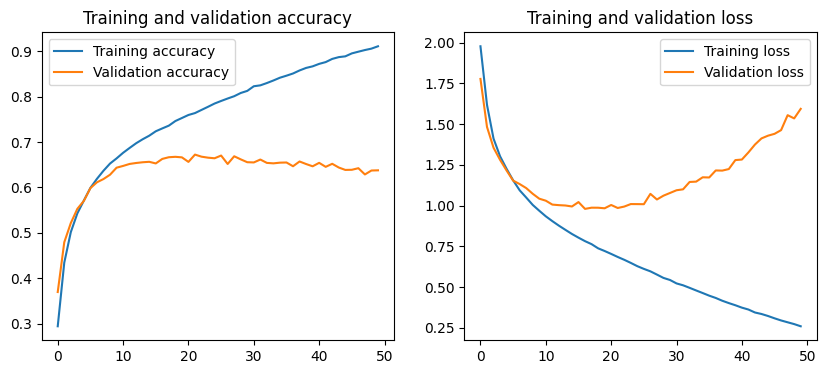

<Figure size 640x480 with 0 Axes>

In [9]:
plot_lists([[acc_1, val_acc_1], [loss_1, val_loss_1]],
           [range(len(acc_1)), range(len(loss_1))],
           [["Training accuracy", "Validation accuracy"], ["Training loss", "Validation loss"]],
           ["Training and validation accuracy","Training and validation loss"])

In [10]:
acc_2, val_acc_2, loss_2, val_loss_2, model_2 = train_model(X_train, y_train, X_test, y_test, [Conv2D(32, 3, activation = 'relu'),
                                                                              Conv2D(64, 3, activation = 'relu'),
                                                                              MaxPooling2D(),
                                                                              Flatten(),
                                                                              Dense(128)], SGD, 0.003, 64, 0.9)


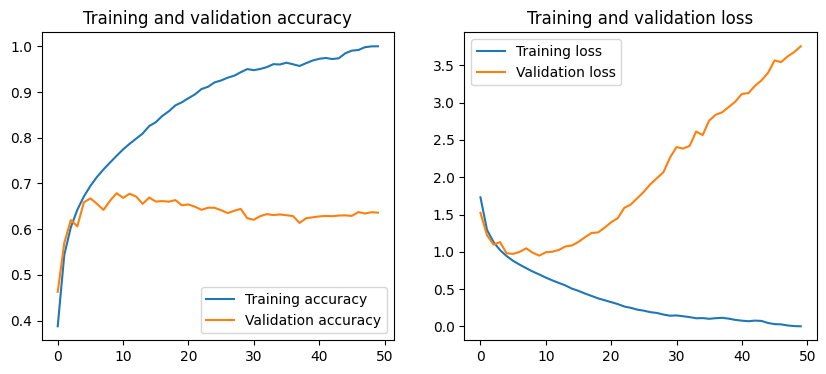

<Figure size 640x480 with 0 Axes>

In [11]:
plot_lists([[acc_2, val_acc_2], [loss_2, val_loss_2]],
           [range(len(acc_2)), range(len(loss_2))],
           [["Training accuracy", "Validation accuracy"], ["Training loss", "Validation loss"]],
           ["Training and validation accuracy","Training and validation loss"])

In [12]:
acc_3, val_acc_3, loss_3, val_loss_3, model_3 = train_model(X_train, y_train, X_test, y_test, [Conv2D(32, 3, activation = 'relu'),
                                                                              Conv2D(64, 3, activation = 'relu'),
                                                                              MaxPooling2D(),
                                                                              Flatten(),
                                                                              Dense(128)], Adam, 0.001, 64)

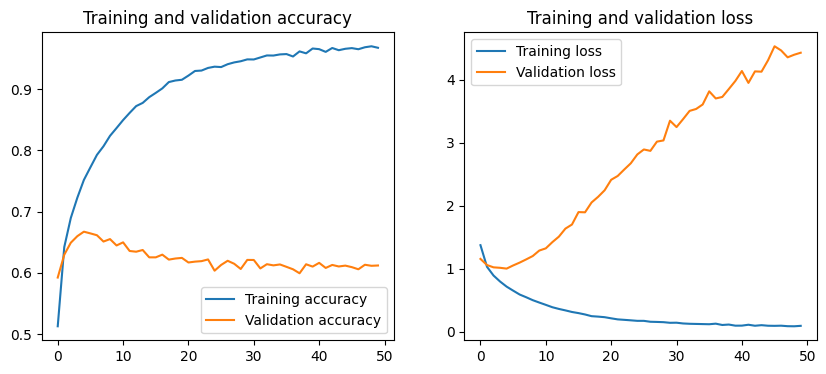

<Figure size 640x480 with 0 Axes>

In [13]:
plot_lists([[acc_3, val_acc_3], [loss_3, val_loss_3]],
           [range(len(acc_3)), range(len(loss_3))],
           [["Training accuracy", "Validation accuracy"], ["Training loss", "Validation loss"]],
           ["Training and validation accuracy","Training and validation loss"])

In [14]:
acc_4, val_acc_4, loss_4, val_loss_4, model_4 = train_model(X_train, y_train, X_test, y_test, [Conv2D(32, 3, activation = 'relu'),
                                                                              Conv2D(64, 3, activation = 'relu'),
                                                                              MaxPooling2D(),
                                                                              Flatten(),
                                                                              Dense(128)], Adam, 0.003, 64)

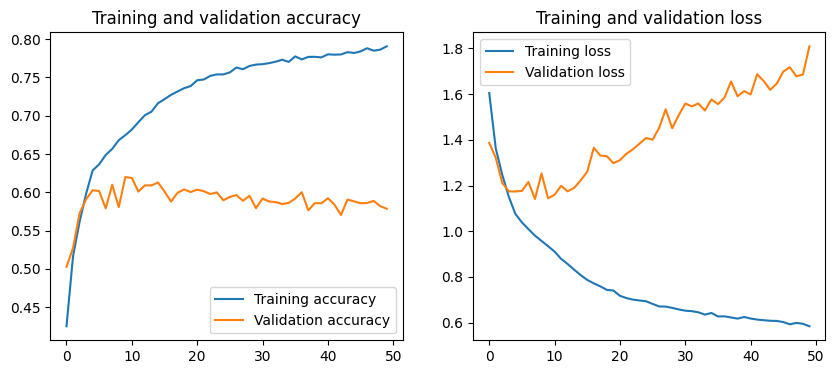

<Figure size 640x480 with 0 Axes>

In [15]:
plot_lists([[acc_4, val_acc_4], [loss_4, val_loss_4]],
           [range(len(acc_4)), range(len(loss_4))],
           [["Training accuracy", "Validation accuracy"], ["Training loss", "Validation loss"]],
           ["Training and validation accuracy","Training and validation loss"])

In [16]:
acc_5, val_acc_5, loss_5, val_loss_5, model_5 = train_model(X_train, y_train, X_test, y_test, [Conv2D(32, 3, activation = 'relu'),
                                                                              Conv2D(64, 3, activation = 'relu'),
                                                                              MaxPooling2D(),
                                                                              Conv2D(32, 3, activation = 'relu'),
                                                                              Conv2D(64, 3, activation = 'relu'),
                                                                              MaxPooling2D(),
                                                                              Flatten(),
                                                                              Dense(128)], SGD, 0.001, 64, 0.9)

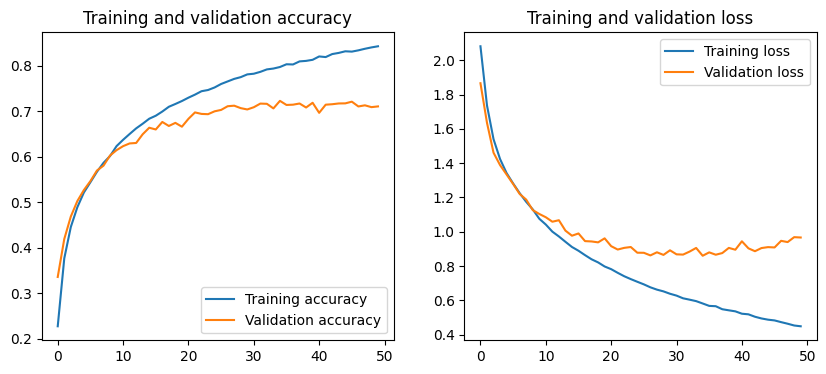

<Figure size 640x480 with 0 Axes>

In [17]:
plot_lists([[acc_5, val_acc_5], [loss_5, val_loss_5]],
           [range(len(acc_5)), range(len(loss_5))],
           [["Training accuracy", "Validation accuracy"], ["Training loss", "Validation loss"]],
           ["Training and validation accuracy","Training and validation loss"])

In [18]:
acc_6, val_acc_6, loss_6, val_loss_6, model_6 = train_model(X_train, y_train, X_test, y_test, [Conv2D(32, 3, activation = 'relu'),
                                                                              Conv2D(64, 3, activation = 'relu'),
                                                                              MaxPooling2D(),
                                                                              Conv2D(32, 3, activation = 'relu'),
                                                                              Conv2D(64, 3, activation = 'relu'),
                                                                              MaxPooling2D(),
                                                                              Flatten(),
                                                                              Dense(128)], SGD, 0.003, 64, 0.9)

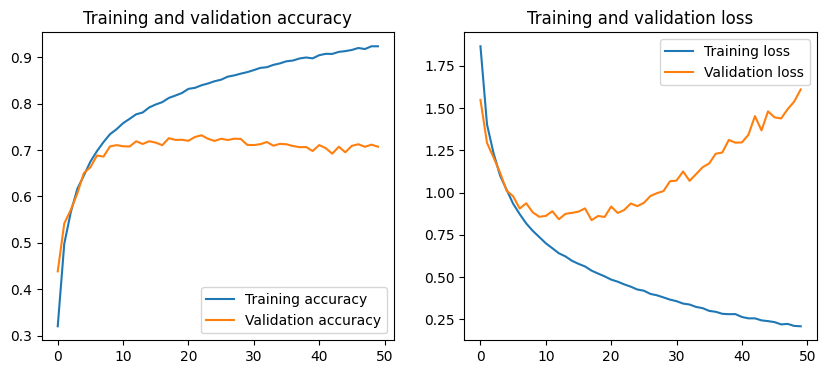

<Figure size 640x480 with 0 Axes>

In [19]:
plot_lists([[acc_6, val_acc_6], [loss_6, val_loss_6]],
           [range(len(acc_6)), range(len(loss_6))],
           [["Training accuracy", "Validation accuracy"], ["Training loss", "Validation loss"]],
           ["Training and validation accuracy","Training and validation loss"])

In [20]:
acc_7, val_acc_7, loss_7, val_loss_7, model_7 = train_model(X_train, y_train, X_test, y_test, [Conv2D(32, 3, activation = 'relu'),
                                                                              Conv2D(64, 3, activation = 'relu'),
                                                                              MaxPooling2D(),
                                                                              Conv2D(32, 3, activation = 'relu'),
                                                                              Conv2D(64, 3, activation = 'relu'),
                                                                              MaxPooling2D(),
                                                                              Flatten(),
                                                                              Dense(128)], Adam, 0.001, 64)

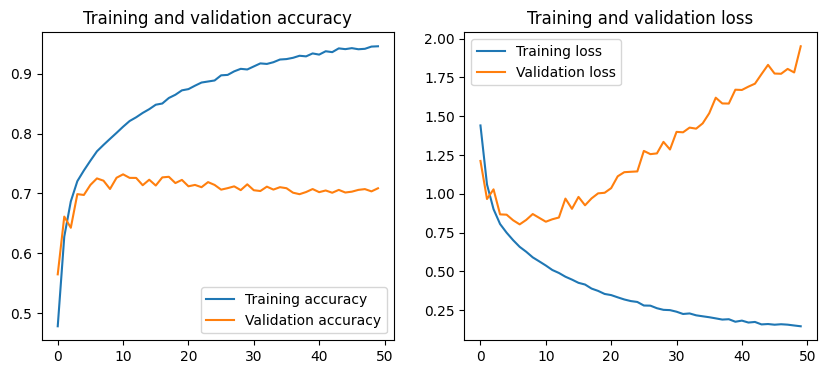

<Figure size 640x480 with 0 Axes>

In [21]:
plot_lists([[acc_7, val_acc_7], [loss_7, val_loss_7]],
           [range(len(acc_7)), range(len(loss_7))],
           [["Training accuracy", "Validation accuracy"], ["Training loss", "Validation loss"]],
           ["Training and validation accuracy","Training and validation loss"])

In [22]:
acc_8, val_acc_8, loss_8, val_loss_8, model_8 = train_model(X_train, y_train, X_test, y_test, [Conv2D(32, 3, activation = 'relu'),
                                                                              Conv2D(64, 3, activation = 'relu'),
                                                                              MaxPooling2D(),
                                                                              Conv2D(32, 3, activation = 'relu'),
                                                                              Conv2D(64, 3, activation = 'relu'),
                                                                              MaxPooling2D(),
                                                                              Flatten(),
                                                                              Dense(128)], Adam, 0.003, 64)

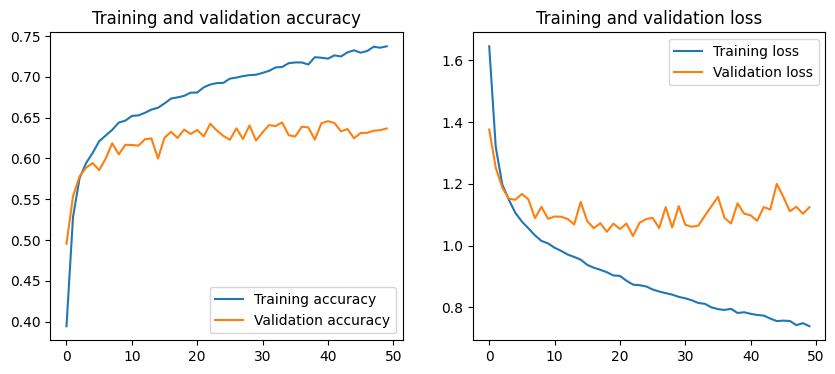

<Figure size 640x480 with 0 Axes>

In [23]:
plot_lists([[acc_8, val_acc_8], [loss_8, val_loss_8]],
           [range(len(acc_8)), range(len(loss_8))],
           [["Training accuracy", "Validation accuracy"], ["Training loss", "Validation loss"]],
           ["Training and validation accuracy","Training and validation loss"])

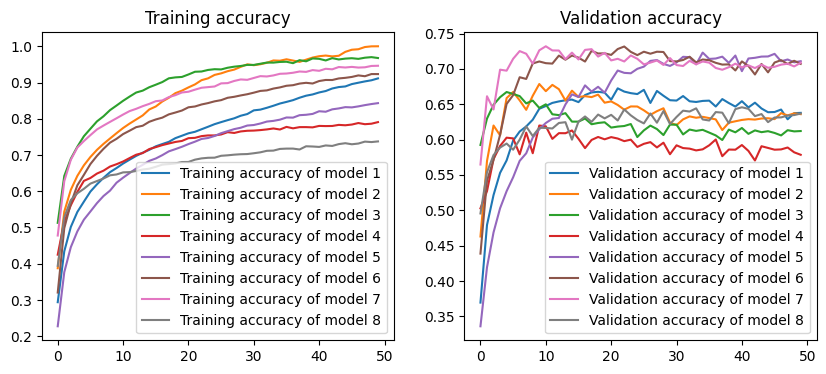

<Figure size 640x480 with 0 Axes>

In [24]:
plot_lists([[acc_1, acc_2, acc_3, acc_4, acc_5, acc_6, acc_7, acc_8], [val_acc_1, val_acc_2, val_acc_3, val_acc_4, val_acc_5, val_acc_6, val_acc_7, val_acc_8]],
           [range(len(acc_1)), range(len(val_acc_1))],
           [[f"Training accuracy of model {i+1}" for i in range(8)], [f"Validation accuracy of model {i+1}" for i in range(8)]],
           ["Training accuracy","Validation accuracy"])

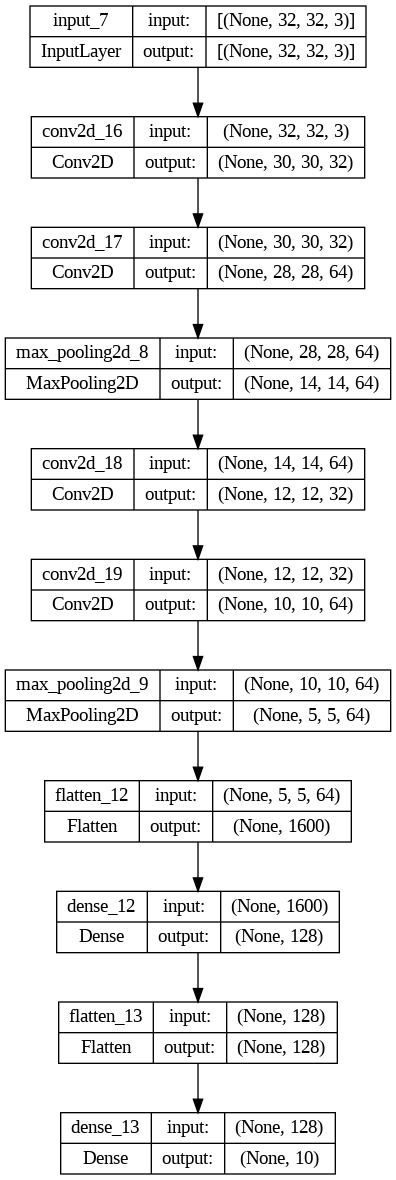

In [27]:
plot_model(model_7, to_file='model_plot.png', show_shapes=True, show_layer_names=True)